# Assignment 1 b Author - Group 5 2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import scipy.stats as stats

In [2]:
# reading csv
df = pd.read_csv("./mod_data.csv")
# Converting date column to datetime format
df['Date']= df['Date'].astype(str) 
for i in df['Date']:
    count = 0
    k = ""
    for j in i:
        count = count+1
        k = k+j
        if count == 4 or count == 6:
            k = k+"-"
    df['Date'][i] = k
df['Date']= pd.to_datetime(df['Date'])

/home/siddhant/.virtualenvs/ma471/lib/python3.6/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


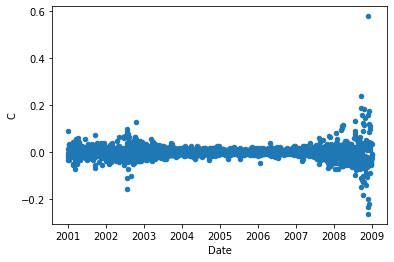

In [3]:
df_C = df.filter(['Date','C'],axis=1)
ax = df_C.plot.scatter(x='Date', y='C')

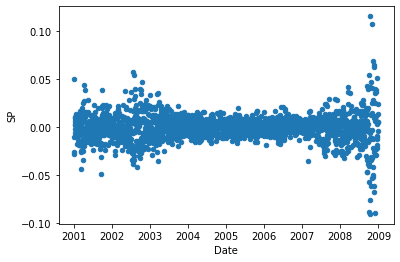

In [4]:
df_SP = df.filter(['Date','SP'],axis=1)
ax = df_SP.plot.scatter(x='Date', y='SP')

In [9]:
df_C_SP = df.filter(['C','SP'],axis=1)
var_s = df_C_SP.var()

In [10]:
mean_s = df_C_SP.mean()

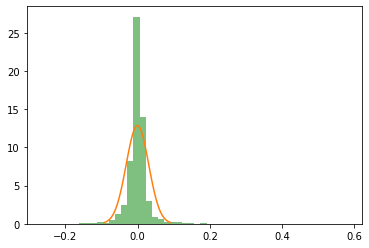

In [14]:
plt.hist(np.array(df['C']),50, density=True, facecolor='g', alpha=0.5)
mu = mean_s['C']
variance = var_s['C']
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

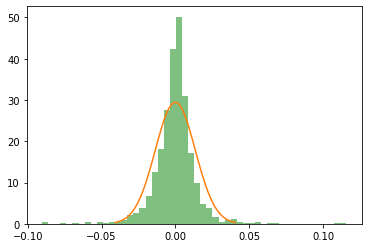

In [37]:
plt.hist(np.array(df['SP']),50, density=True, facecolor='g', alpha=0.5)
mu = mean_s['SP']
variance = var_s['SP']
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.show()

# Exponential Distribution


## For Citigroup (tick symbol C) b = 1.09

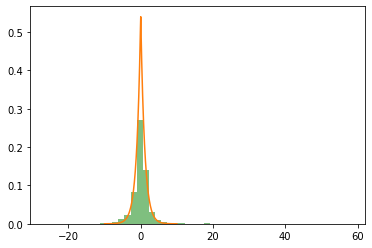

In [239]:
plt.hist(100*np.array(df['C']),50, density=True, facecolor='g', alpha=0.5)
b, mu = 1.09, mean_s['C']
sigma = 10
x = np.linspace(mu -sigma, mu + sigma, 1000)
g = (1/2*b)*np.exp(-(abs(x-mu))/b)
plt.plot(x,g)
plt.show()

## For Standard and Poor’s b = 0.98 

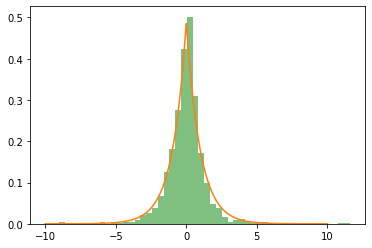

In [141]:
plt.hist(100*np.array(df['SP']),50, density=True, facecolor='g', alpha=0.5)
b, mu = 0.98, mean_s['SP']
sigma = 10
x = np.linspace(mu -sigma, mu + sigma, 1000)
g = (1/2*b)*np.exp(-(abs(x-mu))/b)
plt.plot(x,g)
plt.show()

# T-distribution 

## for Citigroup (tick symbol C) b = 0.01, alpha = 4

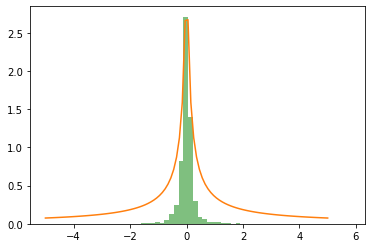

In [201]:
plt.hist(10*np.array(df['C']),50, density=True, facecolor='g', alpha=0.5)
b, mu = 0.01, mean_s['C']
sigma = 5
alpha = 4
x = np.linspace(mu -sigma, mu + sigma, 100)
g = (1/(1+((x**2)/b)**((1+b)/2)))*alpha
plt.plot(x,g)
plt.show()

## For Standard and Poor’s b = 0.0009, alpha = 8

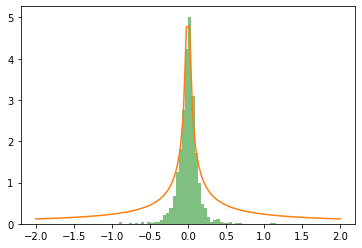

In [202]:
plt.hist(10*np.array(df['SP']),50, density=True, facecolor='g', alpha=0.5)
b, mu = 0.0009, mean_s['SP']
sigma = 2
x = np.linspace(mu -sigma, mu + sigma, 100)
g = (1/(1+((x**2)/b)**((1+b)/2)))*8
plt.plot(x,g)
plt.show()

# Cauchy Distribution

## For Citigroup (tick symbol C) lambda_ = 1.1 

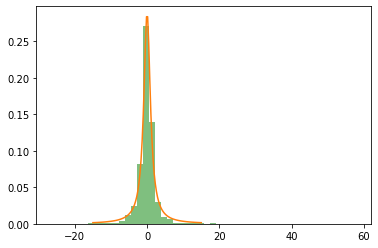

In [231]:
plt.hist(np.array(100*df['C']),50, density=True, facecolor='g', alpha=0.5)
lambda_, mu = 1.1, mean_s['C']
sigma = 15
x = np.linspace(mu -sigma, mu + sigma, 100)
g = (lambda_/np.pi)*(1/((lambda_**2)+(x-mu)**2))
plt.plot(x,g)
plt.show()

## For Standard and Poor’s lambda_ = 0.6

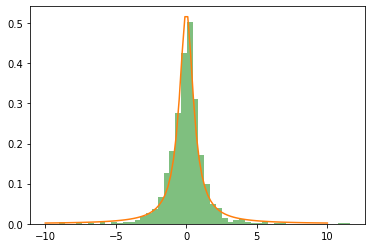

In [220]:
plt.hist(np.array(100*df['SP']),50, density=True, facecolor='g', alpha=0.5)
lambda_, mu = .6, mean_s['SP']
sigma = 10
x = np.linspace(mu -sigma, mu + sigma, 100)
g = (lambda_/np.pi)*(1/((lambda_**2)+(x-mu)**2))
plt.plot(x,g)
plt.show()

# qq-plots between different distribution for C

## Exponential and t distribution 

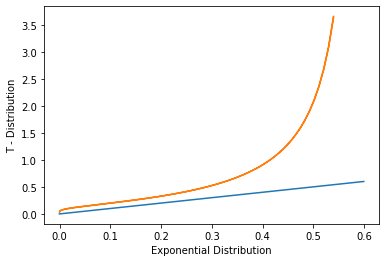

In [246]:
b, mu = 1.09, mean_s['C']
sigma = 10
x = np.linspace(mu -sigma, mu + sigma, 1000)
y = np.linspace(mu -0, mu + 0.6, 1000)
plt.plot(y,y)
expo = (1/2*b)*np.exp(-(abs(x-mu))/b)
b, mu = 0.01, mean_s['C']
alpha = 4
t = (1/(1+((x**2)/b)**((1+b)/2)))*alpha
plt.plot(expo,t)
plt.xlabel("Exponential Distribution")
plt.ylabel("T - Distribution")
plt.show()

## Exponential and Cauchy Distribution

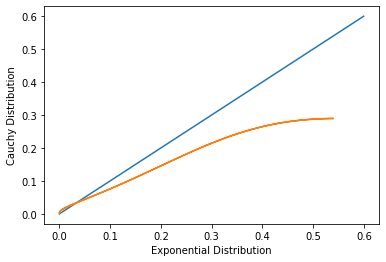

In [250]:
lambda_, mu = 1.1, mean_s['C']
cauchy = (lambda_/np.pi)*(1/((lambda_**2)+(x-mu)**2))
plt.plot(y,y)
plt.plot(expo,cauchy)
plt.xlabel("Exponential Distribution")
plt.ylabel("Cauchy Distribution")
plt.show()

## T and Cauchy Distribution

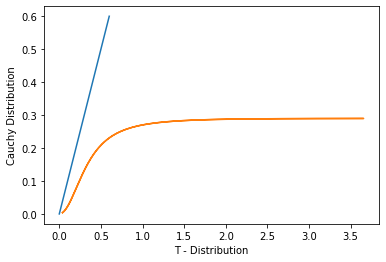

In [252]:
plt.plot(y,y)
plt.plot(t,cauchy)
plt.xlabel("T - Distribution")
plt.ylabel("Cauchy Distribution")
plt.show()

# qq-plot between different distribution for SP

## Exponential and T distribution

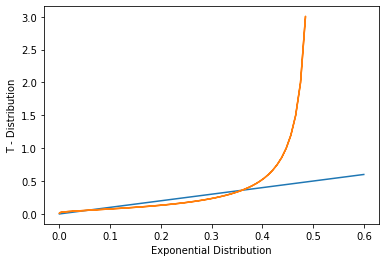

In [255]:
b, mu = 0.98, mean_s['SP']
sigma = 10
x = np.linspace(mu -sigma, mu + sigma, 1000)
y = np.linspace(mu -0, mu + 0.6, 1000)
plt.plot(y,y)
expo = (1/2*b)*np.exp(-(abs(x-mu))/b)
b, mu = 0.0009, mean_s['SP']
alpha = 4
t = (1/(1+((x**2)/b)**((1+b)/2)))*alpha
plt.plot(expo,t)
plt.xlabel("Exponential Distribution")
plt.ylabel("T - Distribution")
plt.show()

## Exponential and Cauchy Distribution

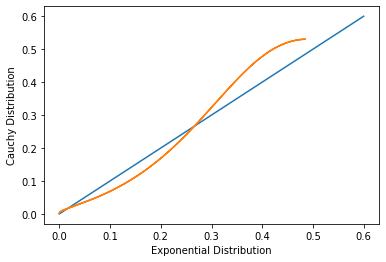

In [257]:
lambda_, mu = 0.6, mean_s['SP']
cauchy = (lambda_/np.pi)*(1/((lambda_**2)+(x-mu)**2))
plt.plot(y,y)
plt.plot(expo,cauchy)
plt.xlabel("Exponential Distribution")
plt.ylabel("Cauchy Distribution")
plt.show()

## T and Cauchy Distribution

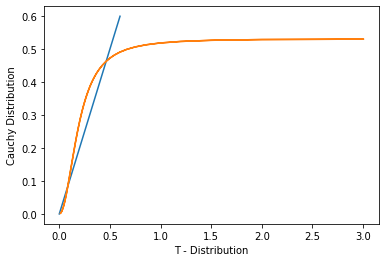

In [258]:
plt.plot(y,y)
plt.plot(t,cauchy)
plt.xlabel("T - Distribution")
plt.ylabel("Cauchy Distribution")
plt.show()